# Project Overview

This project analyzes the NTSB Aviation Accident dataset, which contains aviation accidents from 1962 to 2023. It contains over 80,000 records. This analysis can be used to see the safest airlines with the least accidents, fatalities, and areas that can be improved to reduce such calamities.

# Business Understanding

We have been hired by Sky High Corp. They are interested in **purchasing and operating airplanes** for **commercial and private activities** and they want to know the **potential of risks involved in aviation**.

We have been tasked to find **which aircraft have the lowest risk** for the company to start with as they get into this business venture.

In [1]:
# Importing the necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# To display all columns
pd.set_option('display.max_columns', None)

# To ensure all visualizations stay within the notebook
%matplotlib inline

In [2]:
# Loading the dataset 
aviation_df = pd.read_csv("./data/AviationData.csv", encoding = 'latin-1',
                         dtype = {6: str, 7:str, 28: str})
# dtype = {6: str, 7:str, 28: str}: was used to set the data type for those specific columns to str to avoid errors
aviation_df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,Minor,NaN,NaN,N1867H,PIPER,PA-28-151,No,NaN,NaN,091,NaN,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N2895Z,BELLANCA,7ECA,No,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,Non-Fatal,Substantial,Airplane,N749PJ,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1.0,NaN,091,NaN,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N210CU,CESSNA,210N,No,NaN,NaN,091,NaN,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


# Data Understanding

In [3]:
print(f"The Accident Aviation dataset contains {aviation_df.shape[0]} rows and {aviation_df.shape[1]} columns")

The Accident Aviation dataset contains 88889 rows and 31 columns


In [4]:
aviation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [5]:
# Checking the percentage of null values in all columns
aviation_df.isna().mean()*100

Event.Id                   0.000000
Investigation.Type         0.000000
Accident.Number            0.000000
Event.Date                 0.000000
Location                   0.058500
Country                    0.254250
Latitude                  61.320298
Longitude                 61.330423
Airport.Code              43.469946
Airport.Name              40.611324
Injury.Severity            1.124999
Aircraft.damage            3.593246
Aircraft.Category         63.677170
Registration.Number        1.481623
Make                       0.070875
Model                      0.103500
Amateur.Built              0.114750
Number.of.Engines          6.844491
Engine.Type                7.961615
FAR.Description           63.974170
Schedule                  85.845268
Purpose.of.flight          6.965991
Air.carrier               81.271023
Total.Fatal.Injuries      12.826109
Total.Serious.Injuries    14.073732
Total.Minor.Injuries      13.424608
Total.Uninjured            6.650992
Weather.Condition          5

# Data Preparation

In [6]:
# Converting all column names to lower and replacing dots with underscores
aviation_df.columns = aviation_df.columns.str.lower().str.replace('.', "_", regex = True)
aviation_df.columns

Index(['event_id', 'investigation_type', 'accident_number', 'event_date',
       'location', 'country', 'latitude', 'longitude', 'airport_code',
       'airport_name', 'injury_severity', 'aircraft_damage',
       'aircraft_category', 'registration_number', 'make', 'model',
       'amateur_built', 'number_of_engines', 'engine_type', 'far_description',
       'schedule', 'purpose_of_flight', 'air_carrier', 'total_fatal_injuries',
       'total_serious_injuries', 'total_minor_injuries', 'total_uninjured',
       'weather_condition', 'broad_phase_of_flight', 'report_status',
       'publication_date'],
      dtype='object')

In [7]:
aviation_df.isna().sum()

event_id                      0
investigation_type            0
accident_number               0
event_date                    0
location                     52
country                     226
latitude                  54507
longitude                 54516
airport_code              38640
airport_name              36099
injury_severity            1000
aircraft_damage            3194
aircraft_category         56602
registration_number        1317
make                         63
model                        92
amateur_built               102
number_of_engines          6084
engine_type                7077
far_description           56866
schedule                  76307
purpose_of_flight          6192
air_carrier               72241
total_fatal_injuries      11401
total_serious_injuries    12510
total_minor_injuries      11933
total_uninjured            5912
weather_condition          4492
broad_phase_of_flight     27165
report_status              6381
publication_date          13771
dtype: i

In [8]:
# To get only accidents that happen in the United States and its territories
us_territories = ["United States",'American Samoa','Guam',"Marshall Islands","Micronesia",
                  "Northern Marianas","Palau","Puerto Rico","Virgin Islands","Washington_DC",
                  "Gulf of Mexico","Atlantic Ocean","Pacific Ocean"]
us_accidents = aviation_df[aviation_df['country'].isin(us_territories)]

In [9]:
us_accidents.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82373 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   event_id                82373 non-null  object 
 1   investigation_type      82373 non-null  object 
 2   accident_number         82373 non-null  object 
 3   event_date              82373 non-null  object 
 4   location                82360 non-null  object 
 5   country                 82373 non-null  object 
 6   latitude                32286 non-null  object 
 7   longitude               32276 non-null  object 
 8   airport_code            49247 non-null  object 
 9   airport_name            51714 non-null  object 
 10  injury_severity         82253 non-null  object 
 11  aircraft_damage         80371 non-null  object 
 12  aircraft_category       28195 non-null  object 
 13  registration_number     82322 non-null  object 
 14  make                    82352 non-null

In [10]:
# Checking for the percentage of null values in each column
us_accidents.isna().mean()*100

event_id                   0.000000
investigation_type         0.000000
accident_number            0.000000
event_date                 0.000000
location                   0.015782
country                    0.000000
latitude                  60.805118
longitude                 60.817258
airport_code              40.214633
airport_name              37.219720
injury_severity            0.145679
aircraft_damage            2.430408
aircraft_category         65.771551
registration_number        0.061913
make                       0.025494
model                      0.046132
amateur_built              0.025494
number_of_engines          2.322363
engine_type                3.717237
far_description           65.685358
schedule                  87.449771
purpose_of_flight          3.000983
air_carrier               82.360725
total_fatal_injuries      12.937492
total_serious_injuries    13.811564
total_minor_injuries      13.028541
total_uninjured            6.076020
weather_condition          0

In [11]:
# Dropping unnecessary columns
us_accidents = us_accidents.copy()
us_accidents.drop(['latitude',
                   'longitude', 
                   'schedule',
                   'far_description',
                   'airport_code',
                   'report_status',
                   'publication_date',
                   'air_carrier',
                   'airport_name',], axis = 1, inplace = True)

Some columns had to be changed to appropriate data types:
- `number_of_engines`,`total_fatal_injuries`,`total_serious_injuries`,`total_minor_injuries` and `total_uninjured` had to be changed as people and number of engines cannot be continuous data
- `event_date` had to be changed to a datetime format and the year extracted

In [12]:
# Filling null values with 0 and changing data type to int
# 0 becomes a placeholder
us_accidents['number_of_engines'] = us_accidents['number_of_engines'].fillna(0).astype(int)
us_accidents['total_fatal_injuries'] = us_accidents['total_fatal_injuries'].fillna(0).astype(int)
us_accidents['total_serious_injuries'] = us_accidents['total_serious_injuries'].fillna(0).astype(int)
us_accidents['total_minor_injuries'] = us_accidents['total_minor_injuries'].fillna(0).astype(int)
us_accidents['total_uninjured'] = us_accidents['total_uninjured'].fillna(0).astype(int)

# Only getting the Year the incident/accident happened
us_accidents['event_date'] = pd.to_datetime(us_accidents['event_date'], format='%Y-%m-%d').dt.strftime('%Y')
us_accidents.columns = us_accidents.columns.str.replace('event_date', "event_year")
us_accidents['event_year'] = us_accidents['event_year'].astype(int)

In [13]:
# Checking for duplicated using the event_id
us_accidents[us_accidents.duplicated(subset = 'event_id', keep = False)].head(50)

,event_id,investigation_type,accident_number,event_year,location,country,injury_severity,aircraft_damage,aircraft_category,registration_number,make,model,amateur_built,number_of_engines,engine_type,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight
117,20020917X01908,Accident,DCA82AA012B,1982,"ROCKPORT, TX",United States,Fatal(3),Destroyed,Airplane,N26660,Grumman,AA5A,No,1,Reciprocating,Personal,3,0,0,0,IMC,Approach
118,20020917X01908,Accident,DCA82AA012A,1982,"ROCKPORT, TX",United States,Fatal(3),Destroyed,Airplane,N336SA,Swearingen,SA226-T(B),No,2,Turbo Prop,Executive/corporate,3,0,0,0,IMC,Approach
153,20020917X02259,Accident,LAX82FA049A,1982,"VICTORVILLE, CA",United States,Fatal(2),Destroyed,Airplane,N7860V,Mooney,M20C,No,1,Reciprocating,Personal,2,0,4,0,VMC,Unknown
158,20020917X02400,Accident,MIA82FA038B,1982,"NEWPORT RICHEY, FL",United States,Non-Fatal,Substantial,Airplane,N45453,Cessna,150M,No,1,Reciprocating,Personal,0,0,0,3,VMC,Cruise
159,20020917X02400,Accident,MIA82FA038A,1982,"NEWPORT RICHEY, FL",United States,Non-Fatal,Substantial,Airplane,N32555,Piper,PA-34-200T,No,2,Reciprocating,Personal,0,0,0,3,VMC,Approach
160,20020917X02259,Accident,LAX82FA049B,1982,"VICTORVILLE, CA",United States,Fatal(2),Substantial,Airplane,N32380,Piper,PA-28-235,No,1,Reciprocating,Personal,2,0,4,0,VMC,Cruise
242,20020917X02585,Accident,SEA82DA028A,1982,"MEDFORD, OR",United States,Non-Fatal,Minor,Airplane,N56270,Boeing,A75N1,No,1,Reciprocating,Aerial Application,0,0,0,3,VMC,Taxi
244,20020917X02173,Accident,LAX82DA065B,1982,"SAN JOSE, CA",United States,Non-Fatal,Minor,Airplane,N71681,Bellanca,7KCAB,No,1,Reciprocating,Personal,0,0,0,3,VMC,Standing
245,20020917X02585,Accident,SEA82DA028B,1982,"MEDFORD, OR",United States,Non-Fatal,Substantial,Airplane,N95078,Taylorcraft,BC12-D,No,1,Reciprocating,Personal,0,0,0,3,VMC,Taxi
248,20020917X02173,Accident,LAX82DA065A,1982,"SAN JOSE, CA",United States,Non-Fatal,Substantial,Airplane,N3343D,Cessna,180,No,1,Reciprocating,Personal,0,0,0,3,VMC,Taxi


While trying to check for duplicates in `event_id`, it was discovered that in cases where the `event_id` was duplicated, two aircrafts were involved in the accident. They were both logged in one event_id but different accident_number 

### Aircraft Category Column

The Aircraft Category Column started with around 65% of null values in the column. Since our client mostly wants airplanes data, we had to try to minimize the null values.

The following were done after a lot of research:
- The type of aircraft had to be identified using the `make` and `model` columns.
- Some duplicates were removed in the `make` and `model` columns by converting all values into Title case.
- Depending on the aircrafts we have in the dataset, we determined all that were helicopters, airplanes and some gliders
- Some naming conventions were changed to ensure uniformity in the dataset.

Once most of the data in the `aircraft_category` was cleaned, we were able to reduce the null values from 65% to 13%. The rest of the null values were then dropped

In [14]:
us_accidents.isna().mean()*100

event_id                   0.000000
investigation_type         0.000000
accident_number            0.000000
event_year                 0.000000
location                   0.015782
country                    0.000000
injury_severity            0.145679
aircraft_damage            2.430408
aircraft_category         65.771551
registration_number        0.061913
make                       0.025494
model                      0.046132
amateur_built              0.025494
number_of_engines          0.000000
engine_type                3.717237
purpose_of_flight          3.000983
total_fatal_injuries       0.000000
total_serious_injuries     0.000000
total_minor_injuries       0.000000
total_uninjured            0.000000
weather_condition          0.832797
broad_phase_of_flight     25.657679
dtype: float64

In [15]:
us_accidents['make'].value_counts()

Cessna                21597
Piper                 11670
CESSNA                 4287
Beech                  4168
PIPER                  2509
                      ...  
Hallett                   1
Steven R. Jackson         1
Weste                     1
Arthur P. Matthews        1
ROYSE RALPH L             1
Name: make, Length: 8003, dtype: int64

In [16]:
# Converting all values into Title case
us_accidents['make'] = us_accidents['make'].str.title()
#pd.set_option('display.max_rows', None)
us_accidents['make'].value_counts().head(56)

Cessna                            25884
Piper                             14179
Beech                              5061
Bell                               2296
Boeing                             1496
Mooney                             1294
Grumman                            1142
Bellanca                           1040
Robinson                            926
Hughes                              875
Schweizer                           745
Air Tractor                         645
Aeronca                             635
Maule                               577
Champion                            514
Mcdonnell Douglas                   467
Stinson                             439
Luscombe                            413
Aero Commander                      397
De Havilland                        386
Taylorcraft                         382
North American                      374
Aerospatiale                        351
Hiller                              345
Rockwell                            337


In [17]:
# Imputing the appropriate aircraft category depending on make and model columns
us_accidents.loc[us_accidents['make'] == 'Cessna', 'aircraft_category'] = 'Airplane'
us_accidents.loc[us_accidents['make'] == 'Piper', 'aircraft_category'] = 'Airplane'
us_accidents.loc[us_accidents['make'] == 'Beech', 'aircraft_category'] = 'Airplane'
us_accidents.loc[us_accidents['make'] == 'Mooney', 'aircraft_category'] = 'Airplane'
us_accidents.loc[us_accidents['make'] == 'Bellanca', 'aircraft_category'] = 'Airplane'
us_accidents.loc[us_accidents['make'] == 'Boeing', 'aircraft_category'] = 'Airplane'
us_accidents.loc[us_accidents['make'] == 'American Champion Aircraft', 'aircraft_category'] = 'Airplane'
us_accidents.loc[us_accidents['make'] == 'Aeronca', 'aircraft_category'] = 'Airplane'
us_accidents.loc[us_accidents['make'] == 'Maule', 'aircraft_category'] = 'Airplane'
us_accidents.loc[us_accidents['make'] == 'Stinson', 'aircraft_category'] = 'Airplane'
us_accidents.loc[us_accidents['make'] == 'Luscombe', 'aircraft_category'] = 'Airplane'
us_accidents.loc[us_accidents['make'] == 'Aero Commander', 'aircraft_category'] = 'Airplane'
us_accidents.loc[us_accidents['make'] == 'Taylorcraft', 'aircraft_category'] = 'Airplane'
us_accidents.loc[us_accidents['make'] == 'Rockwell International', 'aircraft_category'] = 'Airplane'
us_accidents.loc[us_accidents['make'] == 'North American', 'aircraft_category'] = 'Helicopter'
us_accidents.loc[us_accidents['make'] == 'Hiller', 'aircraft_category'] = 'Helicopter'
us_accidents.loc[us_accidents['make'] == 'Bell', 'aircraft_category'] = 'Helicopter'
us_accidents.loc[us_accidents['make'] == 'Hughes', 'aircraft_category'] = 'Helicopter'

# Streamlining naming conventions for Robinson Helicopter Company
us_accidents['make'] = us_accidents['make'].replace(['Robinson','Robinson Helicopter','Robinson Helicopter Company'], "Robinson Helicopter Company")
us_accidents.loc[us_accidents['make'] == 'Robinson Helicopter Company', 'aircraft_category'] = 'Helicopter'

# Streamlining naming conventions for Northrop Grumman 
us_accidents['make'] = us_accidents['make'].replace(['Grumman','Grumman American','Grumman American Avn. Corp.'], "Northrop Grumman")
us_accidents.loc[us_accidents['make'] == 'Northrop Grumman', 'aircraft_category'] = 'Airplane'

# Streamlining naming conventions for De Havilland 
us_accidents['make'] = us_accidents['make'].replace(['Dehavilland','De Havilland'], "De Havilland")
us_accidents.loc[us_accidents['make'] == 'De Havilland', 'aircraft_category'] = 'Airplane'

# Streamlining naming conventions for Air Tractor Inc 
us_accidents['make'] = us_accidents['make'].replace(['Air Tractor','Air Tractor Inc'], "Air Tractor Inc")
us_accidents.loc[us_accidents['make'] == 'Air Tractor Inc', 'aircraft_category'] = 'Airplane'

# Streamlining naming conventions for American Champion Aircraft 
us_accidents['make'] = us_accidents['make'].replace(['American Champion Aircraft','Champion'], "American Champion Aircraft")

# Streamlining naming conventions for Rockwell International 
us_accidents['make'] = us_accidents['make'].replace(['Rockwell','Rockwell International'], "Rockwell International")

# Streamlining naming conventions for Cirrus Design Corp 
us_accidents['make'] = us_accidents['make'].replace(['Cirrus Design Corp','Cirrus'], "Cirrus Design Corp")

# Streamlining naming conventions for Aviat Aircraft Inc 
us_accidents['make'] = us_accidents['make'].replace(['Aviat Aircraft Inc','Aviat'], "Aviat Aircraft Inc")

# Streamlining naming conventions for Rockwell International 
us_accidents['make'] = us_accidents['make'].replace(['Ayres Corporation','Ayres'], "Ayres Corporation")

# Streamlining naming conventions for Diamond Aircraft Ind Inc 
us_accidents['make'] = us_accidents['make'].replace(['Diamond Aircraft Ind Inc','Diamond'], "Diamond Aircraft Ind Inc")

# Imputing the appropriate aircraft category depending on make and model columns for Schweizer
us_accidents.loc[(us_accidents['aircraft_category'].isna()) & 
                 (us_accidents['make'] == "Schweizer") & 
                 (us_accidents['model'].str.contains('269|300', na = False, case = False)), 'aircraft_category'] = "Helicopter"
us_accidents.loc[(us_accidents['aircraft_category'].isna()) & 
                 (us_accidents['make'] == "Schweizer") & 
                 (us_accidents['model'].str.contains('2-3|1-2|2-2|1-3|SGS', na = False, case = False)), 'aircraft_category'] = "Glider"
us_accidents.loc[(us_accidents['aircraft_category'].isna()) & 
                 (us_accidents['make'] == "Schweizer") & 
                 (us_accidents['model'].str.contains('164', na = False, case = False)), 'aircraft_category'] = "Airplane"

# Imputing the appropriate aircraft category depending on make and model columns for McDonnell Douglas
us_accidents.loc[(us_accidents['aircraft_category'].isna()) & 
                 (us_accidents['make'] == "Mcdonnell Douglas") & 
                 (us_accidents['model'].str.contains('DC|MD-8|MD-11|MD-9|MD8|MD-10|MD11', na = False, case = False)), 'aircraft_category'] = "Airplane"
us_accidents.loc[(us_accidents['aircraft_category'].isna()) & 
                 (us_accidents['make'] == "Mcdonnell Douglas") & 
                 (us_accidents['model'].str.contains('369|500|600|269|520|90', na = False, case = False)), 'aircraft_category'] = "Helicopter"
us_accidents['make'] = us_accidents['make'].replace('Mcdonnell Douglas', "McDonnell Douglas")

# Replacing UNK with Unknown
us_accidents['aircraft_category'] = us_accidents['aircraft_category'].replace('UNK', "Unknown")

# Dropping the rest of the values
us_accidents.dropna(subset = ['make', 'model','aircraft_category'], inplace = True)

In [18]:
# Final Results
us_accidents['aircraft_category'].value_counts()

Airplane             62544
Helicopter            6465
Glider                 756
Balloon                229
Gyrocraft              172
Weight-Shift           161
Powered Parachute       89
Ultralight              25
WSFT                     9
Unknown                  5
Blimp                    4
Powered-Lift             3
Rocket                   1
ULTR                     1
Name: aircraft_category, dtype: int64

### Location and State Columns

New column had to be computed to get the states and the area that the accident happened
- `area` was to contain the genral area where the accident occured
- `state_short_code` contains the abbreviation for the states and the territories

Due to input errors, especially among the US Territories, manual replacements had to be done to get the correct data. In cases where the area could not be fetched, **UN** is put to represent **Unknown**

In [19]:
# Creating and cleaning up the created columns
new_cols = us_accidents['location'].str.rsplit(',',n = 1, expand = True)
us_accidents['area'] = new_cols[0]
us_accidents['state_abbrev'] = new_cols[1].str.strip()

In [20]:
# pd.set_option('display.max_rows', None)
us_accidents['state_abbrev'].value_counts()

CA                                  7417
AK                                  5264
TX                                  5130
FL                                  4912
AZ                                  2407
                                    ... 
Micronesia (Federated States of)       2
Marshall Islands                       1
MARSHALL ISLANDS                       1
Palau                                  1
CB                                     1
Name: state_abbrev, Length: 68, dtype: int64

In [21]:
# Renaming the short codes accordingly
us_accidents['state_abbrev'] = us_accidents['state_abbrev'].replace(["Virgin Islands (British)", 'CB'], 'VI')
us_accidents['state_abbrev'] = us_accidents['state_abbrev'].replace(["American Samoa","AMERICAN SAMOA"], 'AS')
us_accidents['state_abbrev'] = us_accidents['state_abbrev'].replace("Micronesia (Federated States of)", 'FM')
us_accidents['state_abbrev'] = us_accidents['state_abbrev'].replace(["Marshall Islands","MARSHALL ISLANDS"], 'MH')
us_accidents['state_abbrev'] = us_accidents['state_abbrev'].replace("Palau", 'PW')

# All Empty Values replaced with UN for Unknown
us_accidents['state_abbrev'] = us_accidents['state_abbrev'].replace("", 'UN')
us_accidents['state_abbrev'] = us_accidents['state_abbrev'].fillna('UN')

In [22]:
# pd.set_option('display.max_rows', None)
us_accidents['state_abbrev'].value_counts()

CA    7417
AK    5264
TX    5130
FL    4912
AZ    2407
      ... 
VI       7
AS       4
MH       2
FM       2
PW       1
Name: state_abbrev, Length: 63, dtype: int64

All good

In [23]:
# This dictionary contains thee long form of the state abbreviations
state_abbreviation = {
    "AL": "Alabama",
    "AK": "Alaska",
    "AZ": "Arizona",
    "AR": "Arkansas",
    "CA": "California",
    "CO": "Colorado",
    "CT": "Connecticut",
    "DE": "Delaware",
    "FL": "Florida",
    "GA": "Georgia",
    "HI": "Hawaii",
    "ID": "Idaho",
    "IL": "Illinois",
    "IN": "Indiana",
    "IA": "Iowa",
    "KS": "Kansas",
    "KY": "Kentucky",
    "LA": "Louisiana",
    "ME": "Maine",
    "MD": "Maryland",
    "MA": "Massachusetts",
    "MI": "Michigan",
    "MN": "Minnesota",
    "MS": "Mississippi",
    "MO": "Missouri",
    "MT": "Montana",
    "NE": "Nebraska",
    "NV": "Nevada",
    "NH": "New Hampshire",
    "NJ": "New Jersey",
    "NM": "New Mexico",
    "NY": "New York",
    "NC": "North Carolina",
    "ND": "North Dakota",
    "OH": "Ohio",
    "OK": "Oklahoma",
    "OR": "Oregon",
    "PA": "Pennsylvania",
    "RI": "Rhode Island",
    "SC": "South Carolina",
    "SD": "South Dakota",
    "TN": "Tennessee",
    "TX": "Texas",
    "UT": "Utah",
    "VT": "Vermont",
    "VA": "Virginia",
    "WA": "Washington",
    "WV": "West Virginia",
    "WI": "Wisconsin",
    "WY": "Wyoming",
    "AS": "American Samoa",
    "GU": "Guam",
    "MH": "Marshall Islands",
    "FM": "Micronesia",
    "MP": "Northern Marianas",
    "PW": "Palau",
    "PR": "Puerto Rico",
    "VI": "Virgin Islands",
    "DC": "Washington DC",
    "GM": "Gulf of Mexico",
    "AO": "Atlantic Ocean",
    "PO": "Atlantic Ocean",
    "UN": "Unknown"
}

In [24]:
# Making a new column with the abbreviations
us_accidents['state'] = us_accidents['state_abbrev'].map(state_abbreviation)

In [25]:
us_accidents.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70464 entries, 0 to 88888
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   event_id                70464 non-null  object
 1   investigation_type      70464 non-null  object
 2   accident_number         70464 non-null  object
 3   event_year              70464 non-null  int32 
 4   location                70453 non-null  object
 5   country                 70464 non-null  object
 6   injury_severity         70358 non-null  object
 7   aircraft_damage         69049 non-null  object
 8   aircraft_category       70464 non-null  object
 9   registration_number     70441 non-null  object
 10  make                    70464 non-null  object
 11  model                   70464 non-null  object
 12  amateur_built           70449 non-null  object
 13  number_of_engines       70464 non-null  int32 
 14  engine_type             67650 non-null  object
 15  pu

While investigating the state null values, it was discovered that some columns had the **OF** abbreviation that is not attched to any state and territory as they are not in the United States. They were thus dropped.

In [26]:
us_accidents.drop(us_accidents[us_accidents['state'].isna()].index, inplace = True)

### Injury Columns

A new column, `'total_injured'`, is created. It contains the sum of all the injured columns.

In [27]:
us_accidents['total_injured'] = us_accidents[['total_fatal_injuries',
                                              'total_serious_injuries',
                                              'total_minor_injuries']].sum(axis = 1)
us_accidents

,event_id,investigation_type,accident_number,event_year,location,country,injury_severity,aircraft_damage,aircraft_category,registration_number,make,model,amateur_built,number_of_engines,engine_type,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,area,state_abbrev,state,total_injured
0,20001218X45444,Accident,SEA87LA080,1948,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,Airplane,NC6404,Stinson,108-3,No,1,Reciprocating,Personal,2,0,0,0,UNK,Cruise,MOOSE CREEK,ID,Idaho,2
1,20001218X45447,Accident,LAX94LA336,1962,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,Airplane,N5069P,Piper,PA24-180,No,1,Reciprocating,Personal,4,0,0,0,UNK,Unknown,BRIDGEPORT,CA,California,4
2,20061025X01555,Accident,NYC07LA005,1974,"Saltville, VA",United States,Fatal(3),Destroyed,Airplane,N5142R,Cessna,172M,No,1,Reciprocating,Personal,3,0,0,0,IMC,Cruise,Saltville,VA,Virginia,3
4,20041105X01764,Accident,CHI79FA064,1979,"Canton, OH",United States,Fatal(1),Destroyed,Airplane,N15NY,Cessna,501,No,0,NaN,Personal,1,2,0,0,VMC,Approach,Canton,OH,Ohio,3
5,20170710X52551,Accident,NYC79AA106,1979,"BOSTON, MA",United States,Non-Fatal,Substantial,Airplane,CF-TLU,McDonnell Douglas,DC9,No,2,Turbo Fan,NaN,0,0,1,44,VMC,Climb,BOSTON,MA,Massachusetts,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022,"Annapolis, MD",United States,Minor,NaN,Airplane,N1867H,Piper,PA-28-151,No,0,NaN,Personal,0,1,0,0,NaN,NaN,Annapolis,MD,Maryland,1
88885,20221227106494,Accident,ERA23LA095,2022,"Hampton, NH",United States,NaN,NaN,Airplane,N2895Z,Bellanca,7ECA,No,0,NaN,NaN,0,0,0,0,NaN,NaN,Hampton,NH,New Hampshire,0
88886,20221227106497,Accident,WPR23LA075,2022,"Payson, AZ",United States,Non-Fatal,Substantial,Airplane,N749PJ,American Champion Aircraft,8GCBC,No,1,NaN,Personal,0,0,0,1,VMC,NaN,Payson,AZ,Arizona,0
88887,20221227106498,Accident,WPR23LA076,2022,"Morgan, UT",United States,NaN,NaN,Airplane,N210CU,Cessna,210N,No,0,NaN,Personal,0,0,0,0,NaN,NaN,Morgan,UT,Utah,0


### Injury Severity Column

Cleaning up the `'injury_severity'` column has a lot of fatal rows but contains a number. Let us only remain with **Fatal** and not Fatal(1), Fatal(4) etc.

In [28]:
# Before
us_accidents['injury_severity'].value_counts()

Non-Fatal      56438
Fatal(1)        4013
Fatal           3558
Fatal(2)        2703
Incident        1343
Fatal(3)         899
Fatal(4)         644
Minor            203
Fatal(5)         162
Serious          154
Fatal(6)          97
Fatal(7)          26
Fatal(8)          24
Fatal(10)         14
Unavailable       14
Fatal(9)           6
Fatal(11)          5
Fatal(14)          5
Fatal(25)          3
Fatal(12)          3
Fatal(82)          2
Fatal(17)          2
Fatal(18)          2
Fatal(20)          2
Fatal(13)          2
Fatal(228)         1
Fatal(78)          1
Fatal(21)          1
Fatal(92)          1
Fatal(65)          1
Fatal(64)          1
Fatal(44)          1
Fatal(73)          1
Fatal(230)         1
Fatal(132)         1
Fatal(16)          1
Fatal(27)          1
Fatal(34)          1
Fatal(153)         1
Fatal(111)         1
Fatal(28)          1
Fatal(156)         1
Name: injury_severity, dtype: int64

In [29]:
us_accidents['injury_severity'] = us_accidents['injury_severity'].str.replace(r'\(\d+\)', '', regex = True)

In [30]:
# After
us_accidents['injury_severity'].value_counts()

Non-Fatal      56438
Fatal          12189
Incident        1343
Minor            203
Serious          154
Unavailable       14
Name: injury_severity, dtype: int64

### Make and Model Column

The model column is mostly clean. The biggest worry in this column is user input error where some users have put hyphens or spaces where there shouldn't be or they have been used interchangeably. To curb this and get a more accurate description, removing of the hyphens and whitespaces might be the best way to solve this issue.

It was also seen important to concatenate the two columns for simpler analysis and to explore granularity

In [31]:
us_accidents['model'] = us_accidents['model'].str.replace(r"[-\s]", '', regex = True)
# -: removes hyphens
# s: removes whitespaces

In [32]:
us_accidents['make_model'] = us_accidents['make'] + " " + us_accidents['model']

In [33]:
#pd.set_option('display.max_rows', None)
us_accidents[['make','model']].value_counts()

make                model             
Cessna              152                   2328
                    172                   1636
                    172N                  1144
Piper               PA28140                978
Cessna              172M                   805
                                          ... 
Experimental        QuadCityChallenger       1
                    Nieuport12               1
                    Boland                   1
Excalibur Aircraft  Excalibur                1
Zwicker Murray R    GLASTAR                  1
Length: 8728, dtype: int64

In [34]:
# Dropping rows with "Unavailable" and NaN values
us_accidents.drop(us_accidents[(us_accidents['injury_severity'].isna()) | 
                  (us_accidents['injury_severity'] == "Unavailable") |
                   (us_accidents['amateur_built'] == "Yes") |
                    (us_accidents['amateur_built'].isna())].index, inplace = True)

#### Cleaning Up Null Values

In [35]:
# Filling NaN in aircraft_damage with Unknown
us_accidents['aircraft_damage'] =  us_accidents['aircraft_damage'].fillna('Unknown')

# Filling NaN in engine_type with Unknown
us_accidents['engine_type'] = us_accidents['engine_type'].replace("UNK", "Unknown")
us_accidents['engine_type'] = us_accidents['engine_type'].fillna('Unknown')

# Filling NaN in purpose_of_flight with Unknown
us_accidents['purpose_of_flight'] = us_accidents['purpose_of_flight'].fillna("Unkown")

# Dropping unnecessary Columns
us_accidents.drop(['location',
                   'broad_phase_of_flight',
                   'registration_number',
                   'area',
                   'amateur_built',
                   'accident_number',
                   'weather_condition'
                  ], axis = 1, inplace = True)

In [36]:
# Only remaining with columns which contain Airplane and Helicopters only
us_accidents = us_accidents[(us_accidents['aircraft_category'] == "Airplane") | 
                            (us_accidents['aircraft_category'] == "Helicopter")]

In [37]:
# Filtering us_accidents to only get the top 30 planes
considered_planes = list(us_accidents['make'].value_counts().head(30).index)

us_accidents = us_accidents[us_accidents['make'].isin(considered_planes)]

In [38]:
# Reordering Columns and resetting the index
col_order = ['event_id', 'investigation_type', 'event_year','state_abbrev', 'state','country',
             'aircraft_category', 'make','model','make_model', 'number_of_engines', 'engine_type','purpose_of_flight',
            'total_fatal_injuries', 'total_serious_injuries','total_minor_injuries', 'total_injured', 'total_uninjured',
            'injury_severity', 'aircraft_damage']
us_accidents = us_accidents[col_order].reset_index(drop = True)

This is our cleaned data

In [39]:
us_accidents

,event_id,investigation_type,event_year,state_abbrev,state,country,aircraft_category,make,model,make_model,number_of_engines,engine_type,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_injured,total_uninjured,injury_severity,aircraft_damage
0,20001218X45444,Accident,1948,ID,Idaho,United States,Airplane,Stinson,1083,Stinson 1083,1,Reciprocating,Personal,2,0,0,2,0,Fatal,Destroyed
1,20001218X45447,Accident,1962,CA,California,United States,Airplane,Piper,PA24180,Piper PA24180,1,Reciprocating,Personal,4,0,0,4,0,Fatal,Destroyed
2,20061025X01555,Accident,1974,VA,Virginia,United States,Airplane,Cessna,172M,Cessna 172M,1,Reciprocating,Personal,3,0,0,3,0,Fatal,Destroyed
3,20041105X01764,Accident,1979,OH,Ohio,United States,Airplane,Cessna,501,Cessna 501,0,Unknown,Personal,1,2,0,3,0,Fatal,Destroyed
4,20170710X52551,Accident,1979,MA,Massachusetts,United States,Airplane,McDonnell Douglas,DC9,McDonnell Douglas DC9,2,Turbo Fan,Unkown,0,0,1,1,44,Non-Fatal,Substantial
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61498,20221221106483,Accident,2022,MI,Michigan,United States,Airplane,Cessna,172F,Cessna 172F,0,Unknown,Personal,0,1,0,1,0,Minor,Unknown
61499,20221222106486,Accident,2022,LA,Louisiana,United States,Airplane,Northrop Grumman,AA5B,Northrop Grumman AA5B,0,Unknown,Instructional,0,1,0,1,1,Minor,Unknown
61500,20221227106491,Accident,2022,MD,Maryland,United States,Airplane,Piper,PA28151,Piper PA28151,0,Unknown,Personal,0,1,0,1,0,Minor,Unknown
61501,20221227106497,Accident,2022,AZ,Arizona,United States,Airplane,American Champion Aircraft,8GCBC,American Champion Aircraft 8GCBC,1,Unknown,Personal,0,0,0,0,1,Non-Fatal,Substantial


In [40]:
# Saving the file
us_accidents.to_csv("./data/US_Aviation_Accidents.csv", encoding = 'latin-1', index = False)

# Data Analysis

**Q: Which planes have recorded the highest number of crashes?**

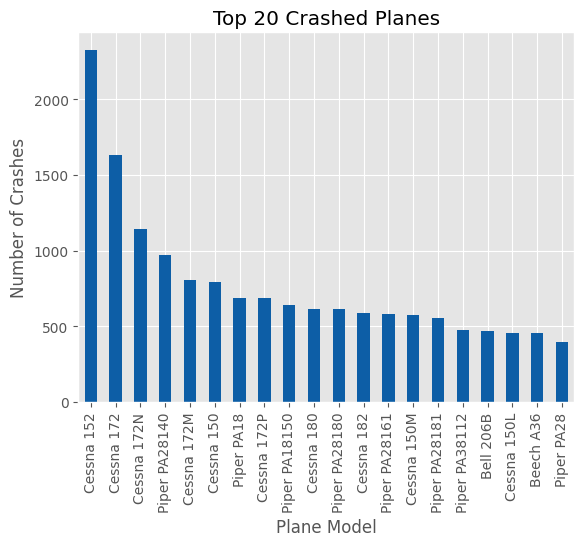

In [41]:
top20_planes = us_accidents['make_model'].value_counts().head(20)
top20_planes.plot(kind = 'bar', color = '#0D5EA6')
plt.title("Top 20 Crashed Planes")
plt.xlabel('Plane Model')
plt.ylabel("Number of Crashes");

**Observations**

The Cessna is the most crashed airplane. From the 20 above, it appears in half of the occurences

The Cessna 172 and its variants have crashed the most. Specifically, the 172, 172N, 172M, and 172P models.

Piper models are also in this list, but 10% less than Cessna.

**Q: Which aircrafts have had the most and the least number of crashes? Does it mean that the aircraft with the least number of crashes is the safest?**

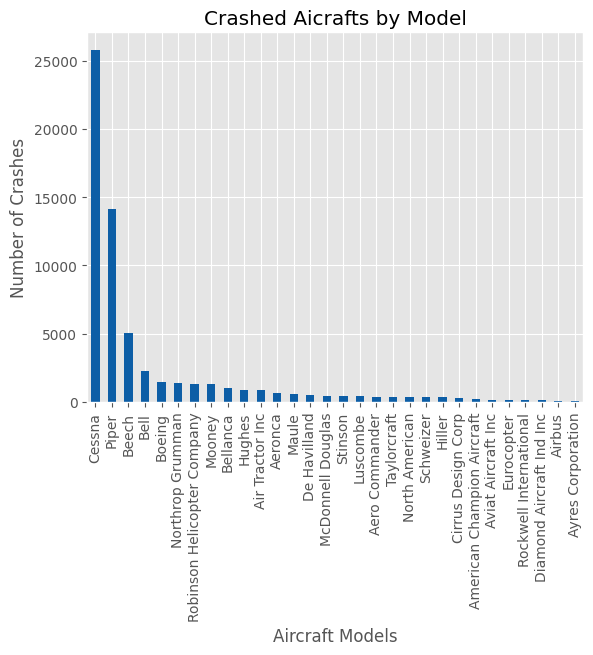

In [42]:
us_accidents['make'].value_counts().plot(kind = 'bar', color = '#0D5EA6')
plt.title("Crashed Aicrafts by Model")
plt.xlabel('Aircraft Models')
plt.ylabel("Number of Crashes");

**Observations**

Cessna, Piper and Beech lead the pack when it comes to the most aircraft crashes with over 5,000 crashes each.

Diamond, Airbus and Ayres have had the least number of crashes since 1948.

However, this doesn't mean that the bottom three are the safest. The above can show that the top 3 are the most preferred planes of the bunch as they are bought more for various reasons.

**Q: Which types of injury severity have been recorded the most?**

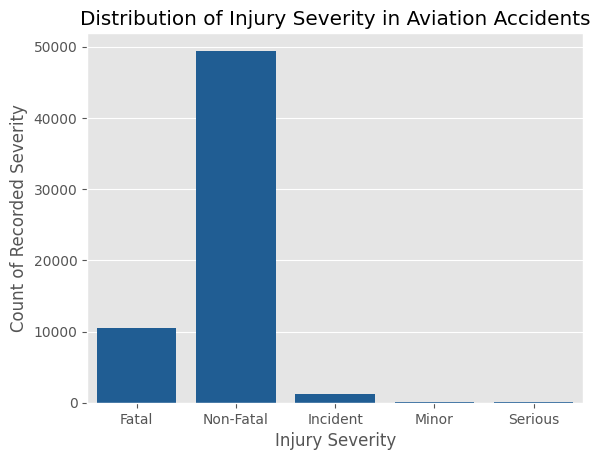

In [43]:
sns.countplot(x ='injury_severity', data = us_accidents, color = '#0D5EA6')
plt.title('Distribution of Injury Severity in Aviation Accidents')
plt.xlabel("Injury Severity")
plt.ylabel("Count of Recorded Severity");

**Observations**

Most accidents have been non-fatal. Only around 10,000 cases have been considered fatal since 1962.

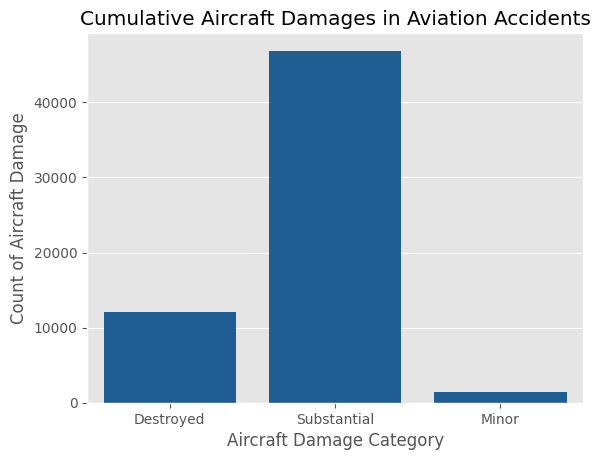

In [44]:
damage = us_accidents.query("aircraft_damage != 'Unknown'")
sns.countplot(x ='aircraft_damage', data = damage, color = '#0D5EA6')
plt.title('Cumulative Aircraft Damages in Aviation Accidents')
plt.xlabel("Aircraft Damage Category")
plt.ylabel("Count of Aircraft Damage");

**Observations**

Most aircraft damages are substantial where the damage greatly affects the structural integrity and lifespan of the aircraft. Such damages also need high costs and great experience to return the aircraft to its former glory, if possible.

**Q: Which aircraft category have recorded the most accidents?**

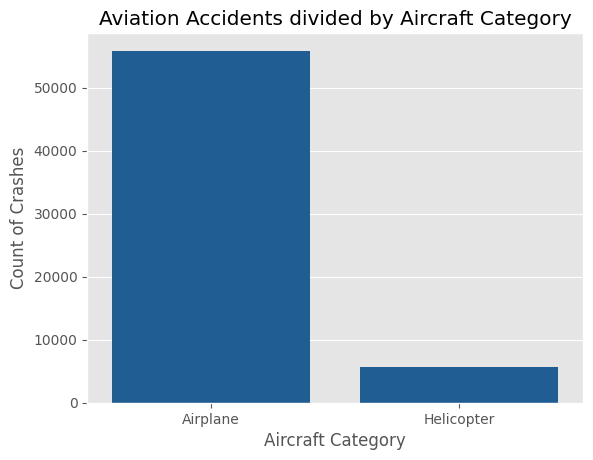

In [45]:
sns.countplot(data = us_accidents, x = 'aircraft_category', color = '#0D5EA6')
plt.title('Aviation Accidents divided by Aircraft Category')
plt.xlabel("Aircraft Category")
plt.ylabel("Count of Crashes");

**Observations**

Airplanes record almost ten times more accidents than helicopters.

**Q: How is the trend of airplane crashes from 1982 to date?**

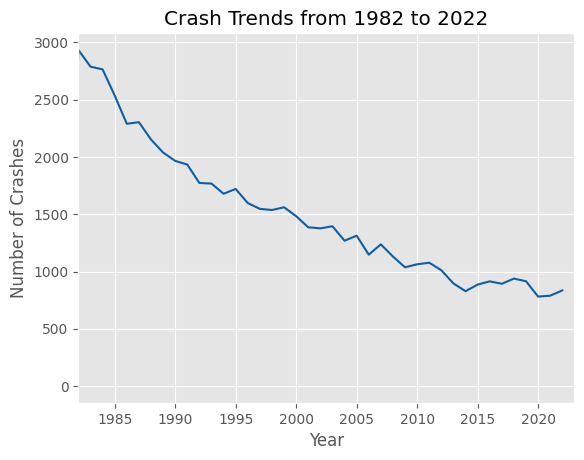

In [46]:
crashes_per_year = us_accidents['event_year'].value_counts().sort_index(ascending = True)
crashes_per_year.plot(color = '#0D5EA6')
plt.title("Crash Trends from 1982 to 2022")
plt.xlabel('Year')
plt.ylabel("Number of Crashes")
plt.xlim(1982, 2023);

**Observations**

Airplane crashes have been on a continuous decline since 1982, showing that planes have become safer as more technology advances and more aviation laws have been passed. 

Planes have thus become safer.

**Q: How have casualties from airplane crashes changed from 1982 to date?**

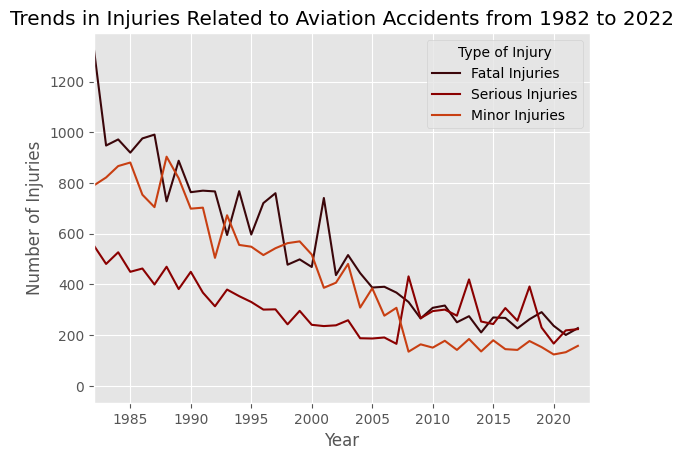

In [47]:
injuries_per_year = us_accidents.groupby('event_year')[['total_fatal_injuries','total_serious_injuries','total_minor_injuries']].sum().sort_index(ascending = True)
injuries_per_year.plot(color = ['#3B060A','#8A0000','#C83F12'])
plt.title("Trends in Injuries Related to Aviation Accidents from 1982 to 2022")
plt.xlabel('Year')
plt.ylabel("Number of Injuries")
plt.legend(title= 'Type of Injury', labels =['Fatal Injuries', 'Serious Injuries','Minor Injuries'])
plt.xlim(1982, 2023);

**Observations**

Similar to airplane crashes, casualties as a result of plane crashes have also declined since 1982 due to advancements in technology and aviation laws, which have made air travel safer.

**Q: What is the trend of casualties and survivors from 1982 to date?**

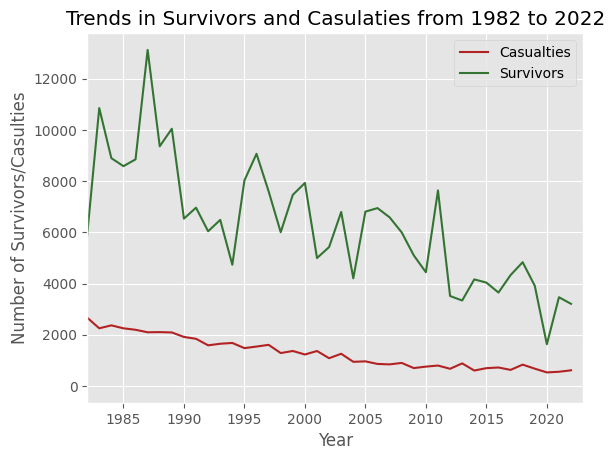

In [48]:
injuries_per_year = us_accidents.groupby('event_year')[['total_injured','total_uninjured']].sum().sort_index(ascending = True)
injuries_per_year.plot(color = ["#B22222","#347433"])
plt.title("Trends in Survivors and Casulaties from 1982 to 2022")
plt.xlabel('Year')
plt.ylabel("Number of Survivors/Casulties")
plt.legend(['Casualties', 'Survivors'])
plt.xlim(1982, 2023);

**Observations**

There has always been a higher number of survivors than casualties over the years. There has been a recorded decline in both survivors and casualties as the accidents have also become fewer.

**Q: What is the relationship between the survivors and the casualties**

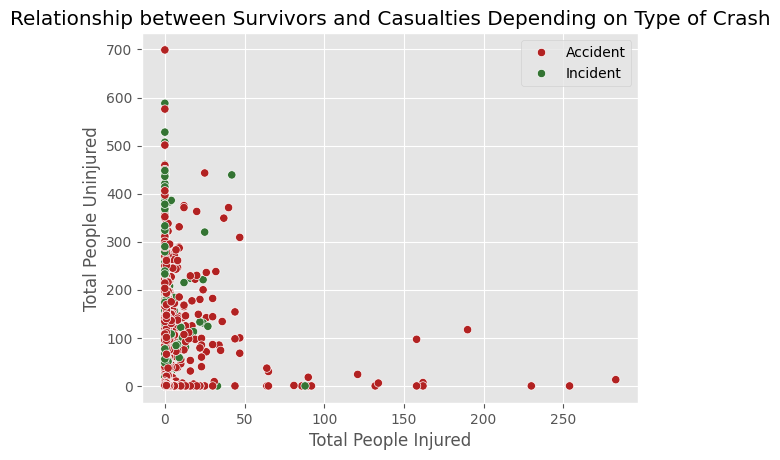

In [49]:
sns.scatterplot(x = "total_injured", 
                y = "total_uninjured", 
                hue = 'investigation_type', 
                data = us_accidents,
                palette = ["#B22222","#347433"])
plt.title("Relationship between Survivors and Casualties Depending on Type of Crash")
plt.xlabel('Total People Injured')
plt.ylabel('Total People Uninjured')
plt.legend();

**Observations**

There is no correlation between those who were injured and those who survived.

**Q: Is there a relationship between the casualties and number of engines in planes?**

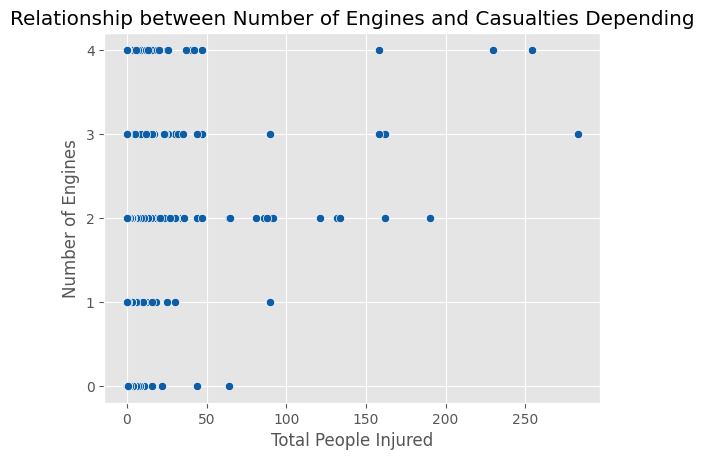

In [50]:
sns.scatterplot(x = "total_injured", 
                y = "number_of_engines",
                data = us_accidents,
                color = '#0D5EA6')
plt.title("Relationship between Number of Engines and Casualties Depending")
plt.xlabel('Total People Injured')
plt.ylabel('Number of Engines')
plt.yticks(range(us_accidents['number_of_engines'].min(), us_accidents['number_of_engines'].max()+1))
plt.show()

**Observations**

There is no correlation number of engines and casualties recorded in plane crashes.

**Q: Which aircraft model has the fatal and non-fatal casualties?**

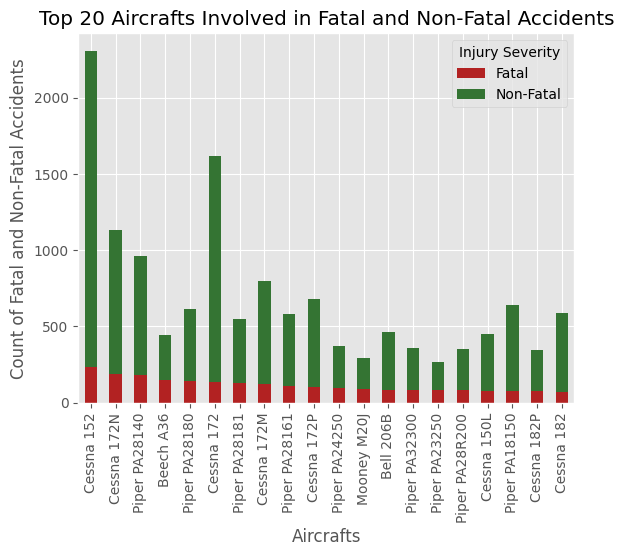

In [51]:
accidents = us_accidents.query("injury_severity == 'Fatal' | injury_severity == 'Non-Fatal'")
accidents = accidents.groupby(['make_model','injury_severity']).size().unstack(fill_value=0)
accidents = accidents.sort_values(by = 'Fatal',ascending = False).head(20)
accidents.plot(color = ["#B22222","#347433"], kind = "bar", stacked = True)
plt.title("Top 20 Aircrafts Involved in Fatal and Non-Fatal Accidents")
plt.xlabel('Aircrafts')
plt.ylabel("Count of Fatal and Non-Fatal Accidents")
plt.legend(title = "Injury Severity");

**Observations**

Most airplane crashes are usually non-fatal. Non-fatal accidents are accidents that do not lead to fatalities.

Out of the top 20, Piper planes constitute 45% of the planes, and Cessna constitutes 40%. It can be argued that both of these aircraft manufacturers are the safest since they have the highest survival rate.

# Conclusion

- Airplane crashes and aviation casualties have become rarer and rarer with each passing year as technology keeps advancing and better aviation laws get passed. 
- Most accidents that do occur do not lead to loss of life but do have a great impact on the aircraft's lifespan and structural integrity.
- Most crashes involve aircraft from Cessna and Piper Aircraft. However, they seem to be the most preferred when it comes to personal aircraft. Specifically, the Cessna 172 and the Piper PA-28 lineups of aircraft.

# Business Recommendations

* As a starting business venture, it is recommended to start with aircraft with proven track records. Cessnas have been seen as the market leader, from small commercial trips to personal aircraft with the Cessna Citation and the Cessna 172 lineups of aircraft, respectively.
* The Cessna 172 and Piper PA-28 aircraft have been shown to lead the pack when it comes to personal use aircraft. Both have a wide variety of models that have been improving technologically to offer safety and peace of mind. The latest models for both are the Cessna 172 Skyhawk and Piper PA-28 Cherokee.
* It should also be noted that, according to [NASA](https://ntrs.nasa.gov/api/citations/20190001065/downloads/20190001065.pdf) and [Husain Law](https://hlalawfirm.com/8-aviation-accidents-caused-by-human-factors/), almost 80% of aviation accidents are caused by pilot error and not mechanical error. Therefore, Sky High Corp should greatly focus on hiring pilots with great track records and keep them trained and satisfied to reduce the risk of pilot error